In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # Import SVC here
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV

In [3]:
#set max row and col for pandas dataframe
pd.set_option ('display.max_columns', None)
pd.set_option ('display.max_row',200)

In [4]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_excel("Student_Employability_dataset_2025.xlsx")

In [6]:
data.head()

,Name_of_Student,GENDER,GENERAL_APPEARANCE,GENERAL_POINT_AVERAGE,MANNER_OF_SPEAKING,PHYSICAL_CONDITION,MENTAL_ALERTNESS,SELF-CONFIDENCE,ABILITY_TO_PRESENT_IDEAS,COMMUNICATION_SKILLS,STUDENT_PERFORMANCE_RATING,NO_SKILLS,CLASS,Year_of_Graduate
0,Student 1,1,4,4,5,4,5,5,5,5,5,5,Employable,2019
1,Student 2,1,4,4,4,4,4,4,4,3,5,4,Employable,2019
2,Student 3,1,4,4,3,3,3,3,3,2,5,3,LessEmployable,2020
3,Student 4,1,3,3,3,3,2,3,3,3,5,3,LessEmployable,2020
4,Student 5,1,4,4,4,3,3,4,4,3,5,4,Employable,2019


## Exploring the dataset

In [7]:
data.shape

(2982, 14)

In [8]:
# Examine the Type of variables in the dataset
data. info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Name_of_Student             2982 non-null   object
 1   GENDER                      2982 non-null   int64 
 2   GENERAL_APPEARANCE          2982 non-null   int64 
 3   GENERAL_POINT_AVERAGE       2982 non-null   int64 
 4   MANNER_OF_SPEAKING          2982 non-null   int64 
 5   PHYSICAL_CONDITION          2982 non-null   int64 
 6   MENTAL_ALERTNESS            2982 non-null   int64 
 7   SELF-CONFIDENCE             2982 non-null   int64 
 8   ABILITY_TO_PRESENT_IDEAS    2982 non-null   int64 
 9   COMMUNICATION_SKILLS        2982 non-null   int64 
 10  STUDENT_PERFORMANCE_RATING  2982 non-null   int64 
 11  NO_SKILLS                   2982 non-null   int64 
 12  CLASS                       2982 non-null   object
 13  Year_of_Graduate            2982 non-null   int6

In [9]:
# Check on the dataset head
data.head(10)

,Name_of_Student,GENDER,GENERAL_APPEARANCE,GENERAL_POINT_AVERAGE,MANNER_OF_SPEAKING,PHYSICAL_CONDITION,MENTAL_ALERTNESS,SELF-CONFIDENCE,ABILITY_TO_PRESENT_IDEAS,COMMUNICATION_SKILLS,STUDENT_PERFORMANCE_RATING,NO_SKILLS,CLASS,Year_of_Graduate
0,Student 1,1,4,4,5,4,5,5,5,5,5,5,Employable,2019
1,Student 2,1,4,4,4,4,4,4,4,3,5,4,Employable,2019
2,Student 3,1,4,4,3,3,3,3,3,2,5,3,LessEmployable,2020
3,Student 4,1,3,3,3,3,2,3,3,3,5,3,LessEmployable,2020
4,Student 5,1,4,4,4,3,3,4,4,3,5,4,Employable,2019
5,Student 6,1,4,4,4,3,3,3,3,3,5,3,Employable,2019
6,Student 7,1,4,4,4,4,3,3,3,3,3,3,Employable,2019
7,Student 8,1,5,5,3,3,4,3,3,3,5,3,Employable,2019
8,Student 9,1,4,4,4,4,4,4,4,4,5,4,Employable,2019
9,Student 10,1,4,4,4,3,4,3,4,4,5,3,Employable,2019


In [10]:
numeric_data = data.select_dtypes(include='number')

In [11]:
summary_stats = pd.DataFrame({
    'Count': numeric_data.count(),
    'Mean': numeric_data.mean(),
    'Median': numeric_data.median(),
    'Mode': numeric_data.mode().iloc[0],  # Take the first mode value
    'Std Dev': numeric_data.std(),
    'Min': numeric_data.min(),
    '25%': numeric_data.quantile(0.25),
    '50%': numeric_data.quantile(0.50),  # Optional, same as Median
    '75%': numeric_data.quantile(0.75),
    'Max': numeric_data.max(),
    'Skewness': numeric_data.skew()
})

In [12]:
summary_stats = summary_stats
summary_stats


,Count,Mean,Median,Mode,Std Dev,Min,25%,50%,75%,Max,Skewness
GENDER,2982,1.556338,2.0,2,0.496899,1,1.0,2.0,2.0,2,-0.226911
GENERAL_APPEARANCE,2982,4.246814,4.0,4,0.678501,2,4.0,4.0,5.0,5,-0.452415
GENERAL_POINT_AVERAGE,2982,4.246814,4.0,4,0.678501,2,4.0,4.0,5.0,5,-0.452415
MANNER_OF_SPEAKING,2982,3.884641,4.0,4,0.757013,2,3.0,4.0,4.0,5,-0.028022
PHYSICAL_CONDITION,2982,3.972166,4.0,4,0.744135,2,3.0,4.0,5.0,5,-0.111690
MENTAL_ALERTNESS,2982,3.962777,4.0,4,0.781982,2,3.0,4.0,5.0,5,-0.212908
SELF-CONFIDENCE,2982,3.910798,4.0,4,0.807602,2,3.0,4.0,5.0,5,0.037227
ABILITY_TO_PRESENT_IDEAS,2982,3.813883,4.0,4,0.739390,2,3.0,4.0,4.0,5,-0.097850
COMMUNICATION_SKILLS,2982,3.525486,3.0,3,0.743881,2,3.0,3.0,4.0,5,0.218410
STUDENT_PERFORMANCE_RATING,2982,4.610664,5.0,5,0.692845,3,4.0,5.0,5.0,5,-1.493381


## Univariate Analysis

In [13]:
# Copy the dataset and select only numeric columns
rf1 = data.select_dtypes(include=['float64', 'int64'])

In [14]:
# Set seaborn style
sns.set_palette("muted", color_codes=True)

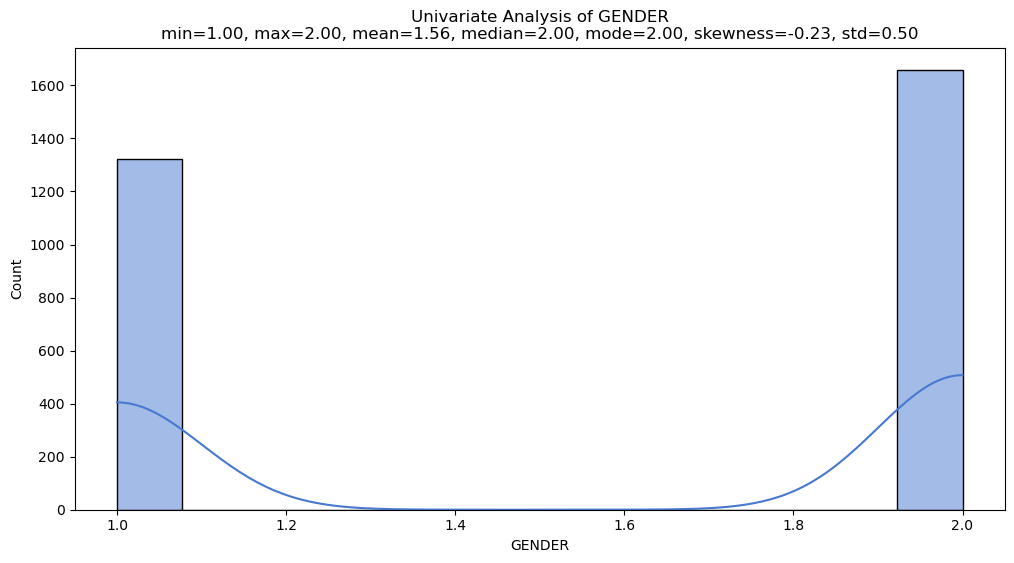

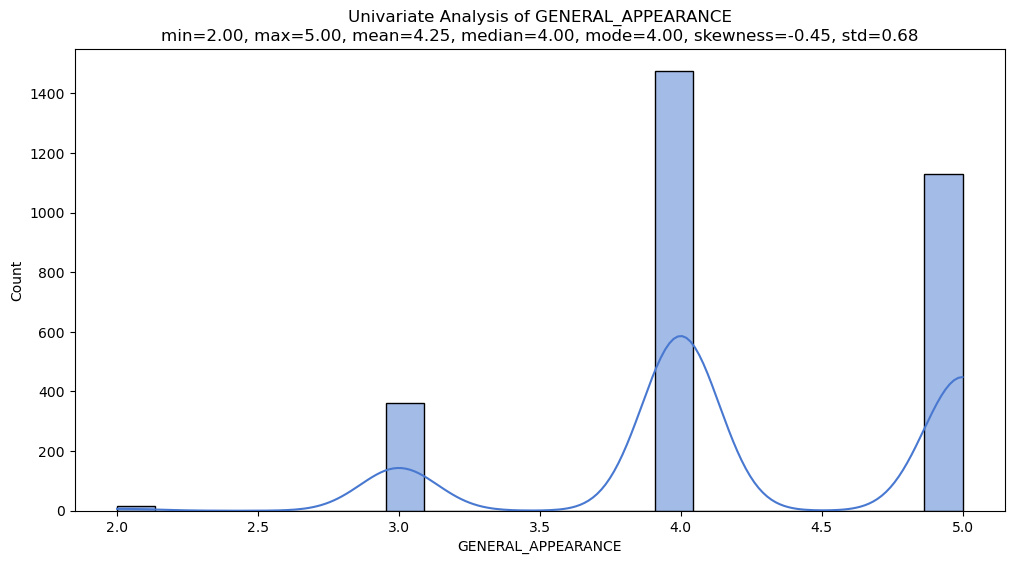

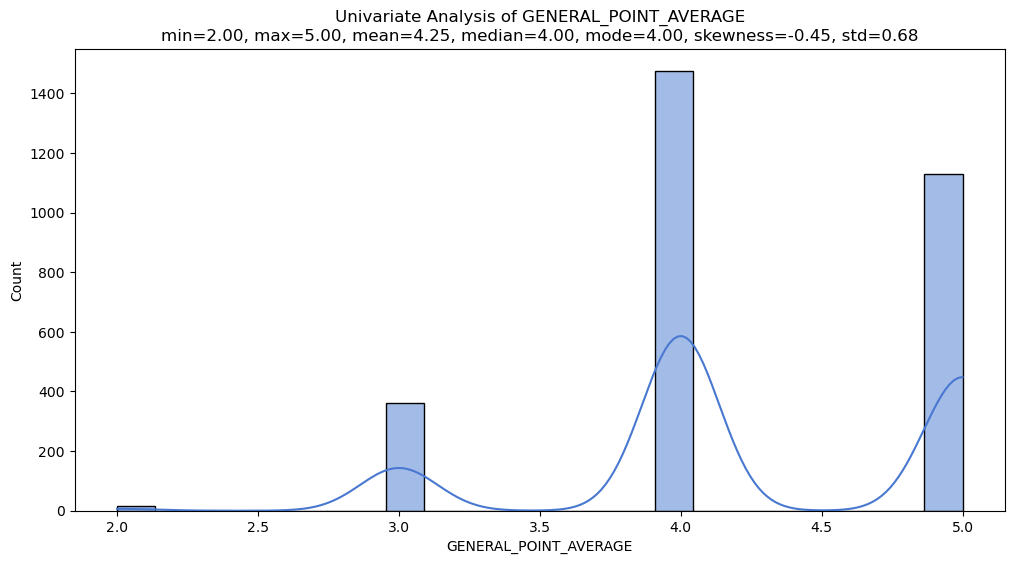

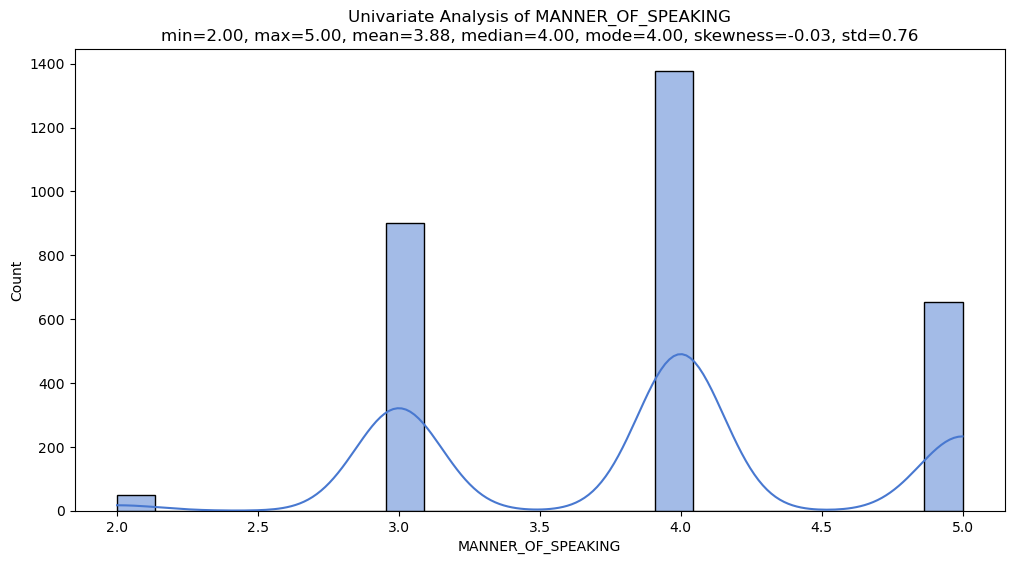

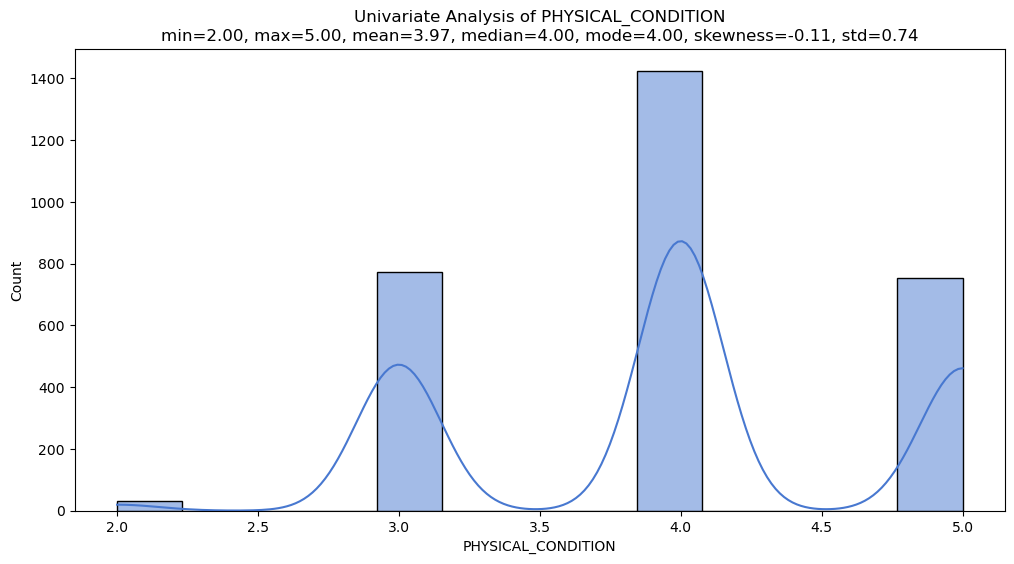

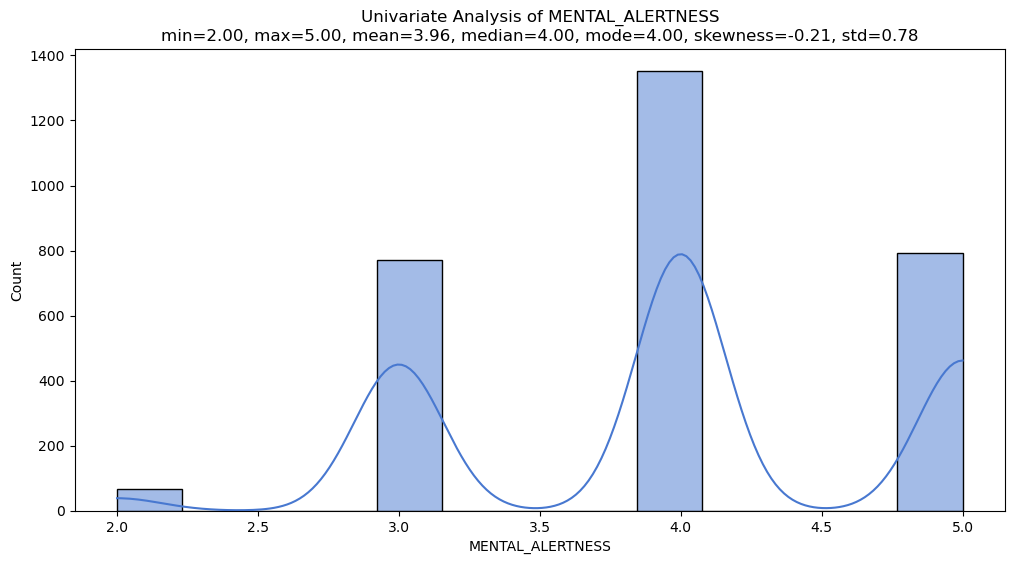

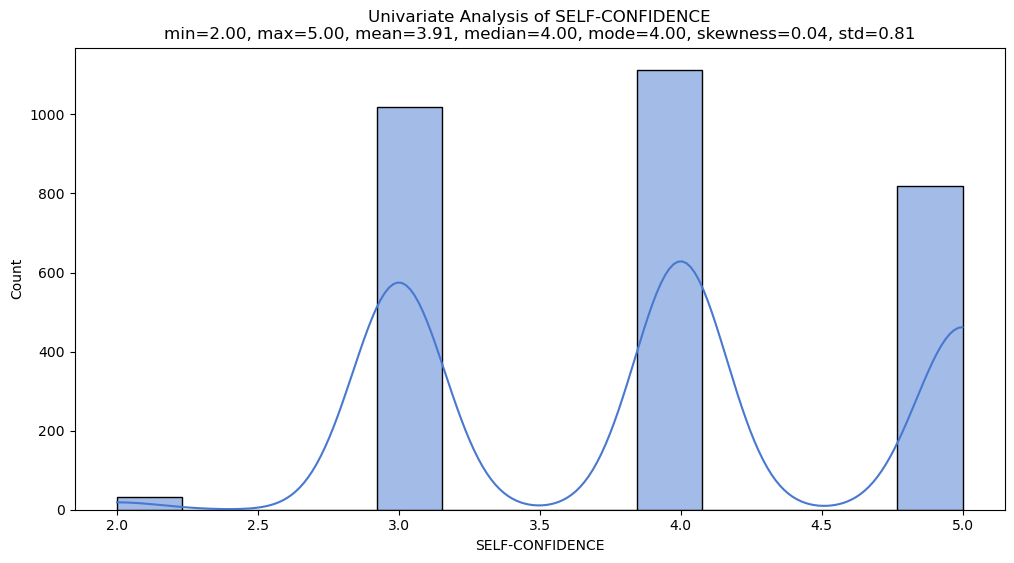

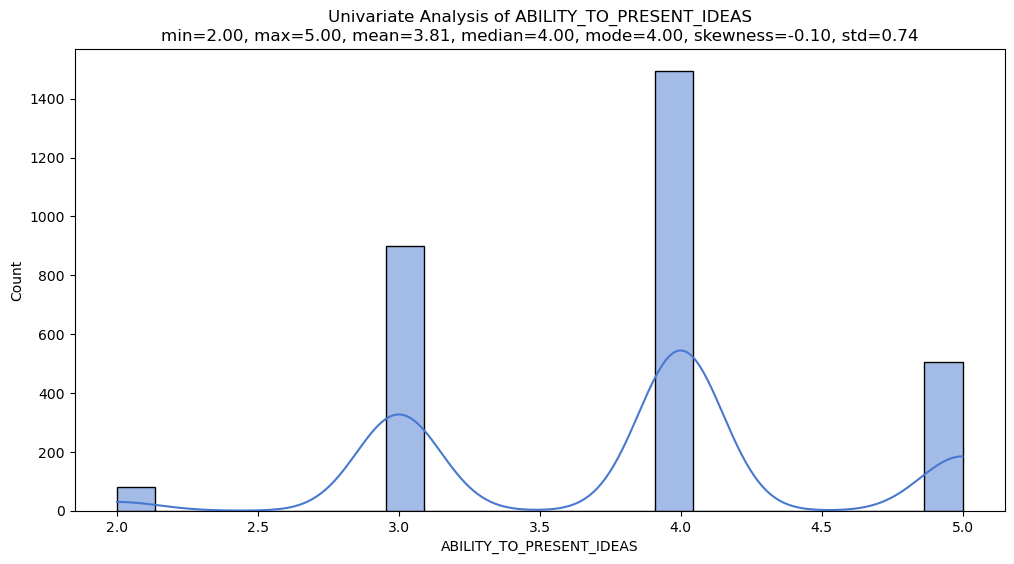

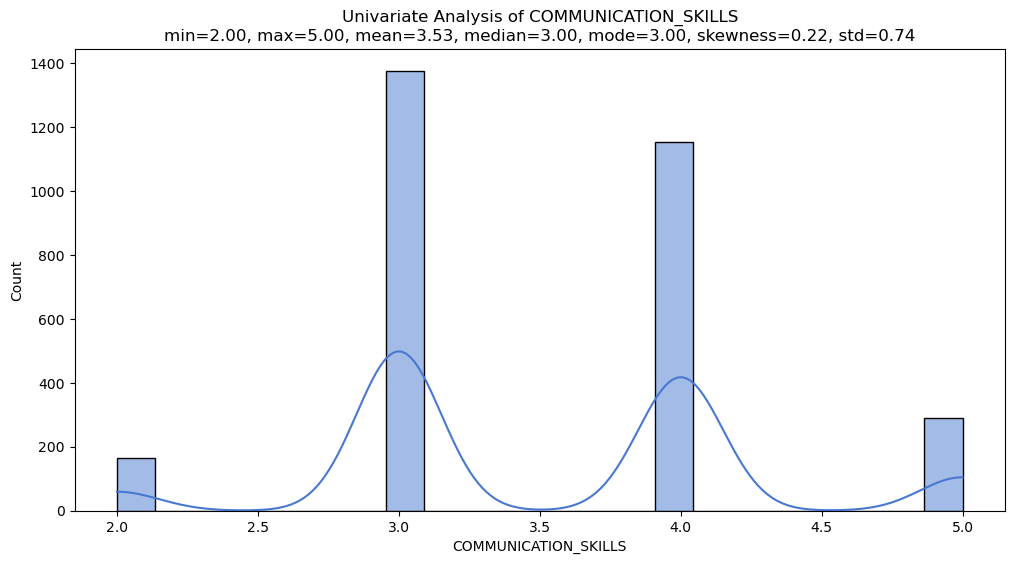

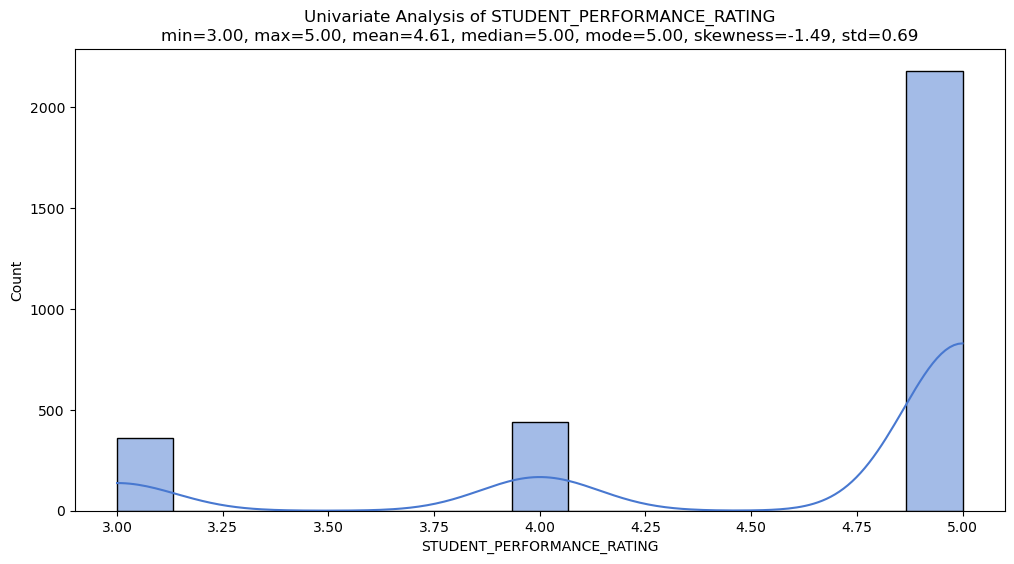

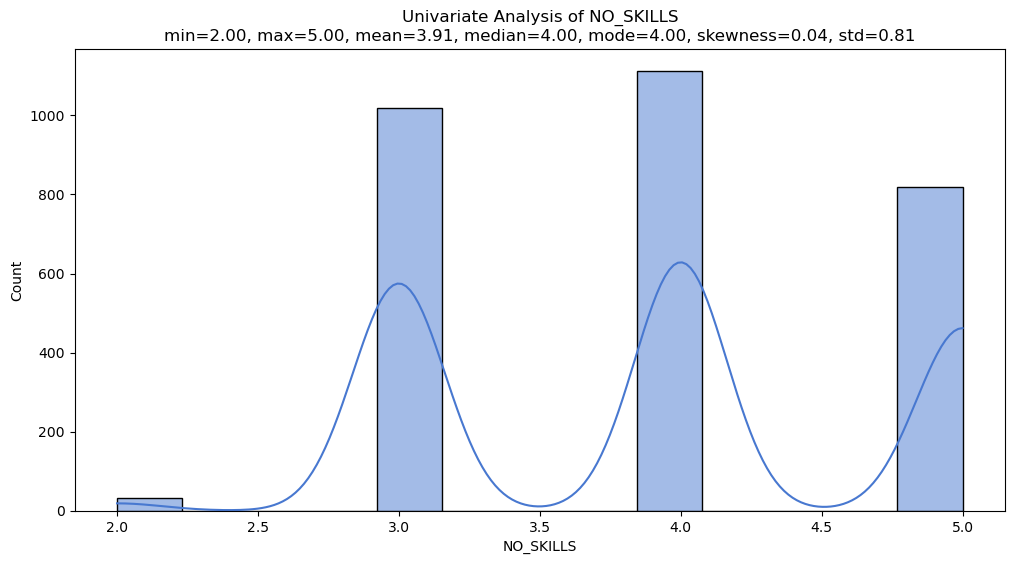

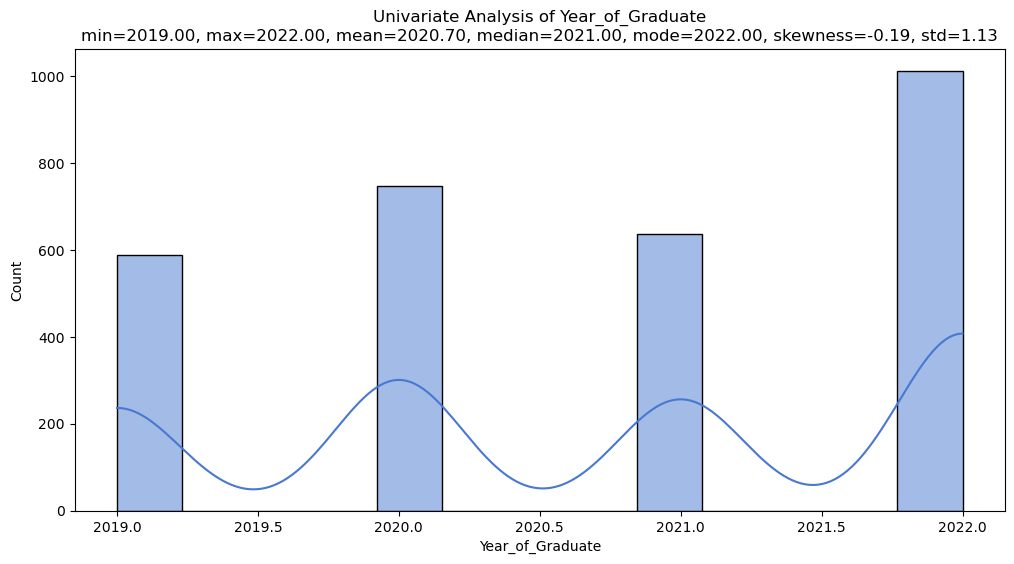

In [15]:
sns.set_palette("muted", color_codes=True)

# Loop through numeric columns
for col in rf1.columns:
    plt.figure(figsize=(12, 6))

    # Plot histogram with KDE
    sns.histplot(data=rf1, x=col, kde=True)

    # Compute descriptive stats
    col_min = rf1[col].min()
    col_max = rf1[col].max()
    col_mean = rf1[col].mean()
    col_median = rf1[col].median()
    col_mode = rf1[col].mode().iloc[0]
    col_skewness = rf1[col].skew()
    col_std = rf1[col].std()

    # Labels and title
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Univariate Analysis of {col}\n"
              f"min={col_min:.2f}, max={col_max:.2f}, "
              f"mean={col_mean:.2f}, median={col_median:.2f}, "
              f"mode={col_mode:.2f}, skewness={col_skewness:.2f}, std={col_std:.2f}")

    plt.show()


## Bivariate Analysis

In [16]:
from scipy.stats import chi2_contingency # Import the chi2_contingency function


In [17]:
data_numeric = data.select_dtypes(include='number')
dependent_var = 'STUDENT_PERFORMANCE_RATING'

In [18]:
# Cross-tabulations and Chi-square test
crosstab_list = []
chi2_data = []
boxplot_vars = []

In [19]:
for col in data_numeric.columns:
    if col != dependent_var:
        ctab = pd.crosstab(data_numeric[col], data_numeric[dependent_var])
        crosstab_list.append((col, ctab))

        # Chi-square test
        chi2_stat, p_val, dof, _ = chi2_contingency(ctab)
        chi2_data.append({
            "Variable": col,
            "Chi-Square": chi2_stat,
            "p-value": p_val,
            "Degrees of Freedom": dof
        })

        # Boxplot list
        boxplot_vars.append(col)



In [20]:
# Convert chi-square results to DataFrame
chi2_df_full = pd.DataFrame(chi2_data).sort_values("p-value")

# Display chi-square results using pandas' display function instead of ace_tools
# This provides a default way to display the DataFrame
display(chi2_df_full)

,Variable,Chi-Square,p-value,Degrees of Freedom
7,ABILITY_TO_PRESENT_IDEAS,311.060484,3.485446e-64,6
6,SELF-CONFIDENCE,97.099565,1.010015e-18,6
9,NO_SKILLS,97.099565,1.010015e-18,6
3,MANNER_OF_SPEAKING,96.109961,1.623693e-18,6
5,MENTAL_ALERTNESS,50.372474,3.958268e-09,6
8,COMMUNICATION_SKILLS,48.445375,9.626211e-09,6
1,GENERAL_APPEARANCE,40.722935,3.283295e-07,6
2,GENERAL_POINT_AVERAGE,40.722935,3.283295e-07,6
4,PHYSICAL_CONDITION,35.318252,3.738843e-06,6
10,Year_of_Graduate,3.215514,7.813519e-01,6


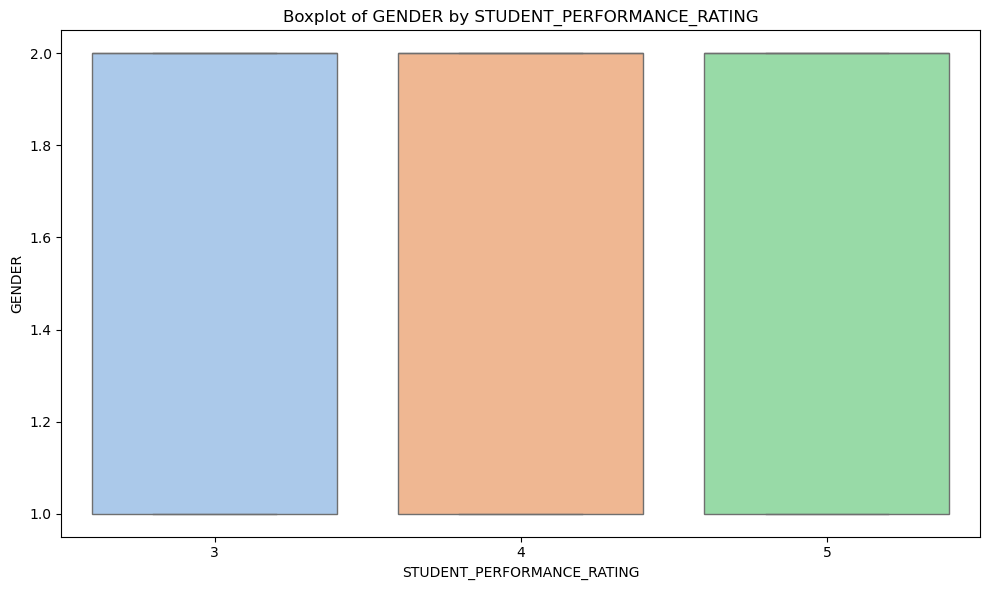

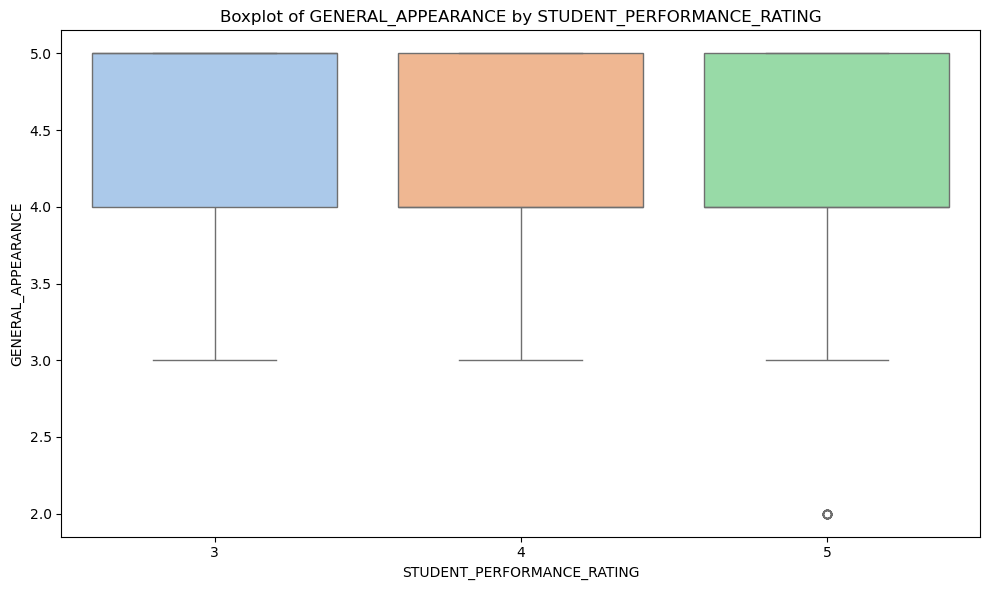

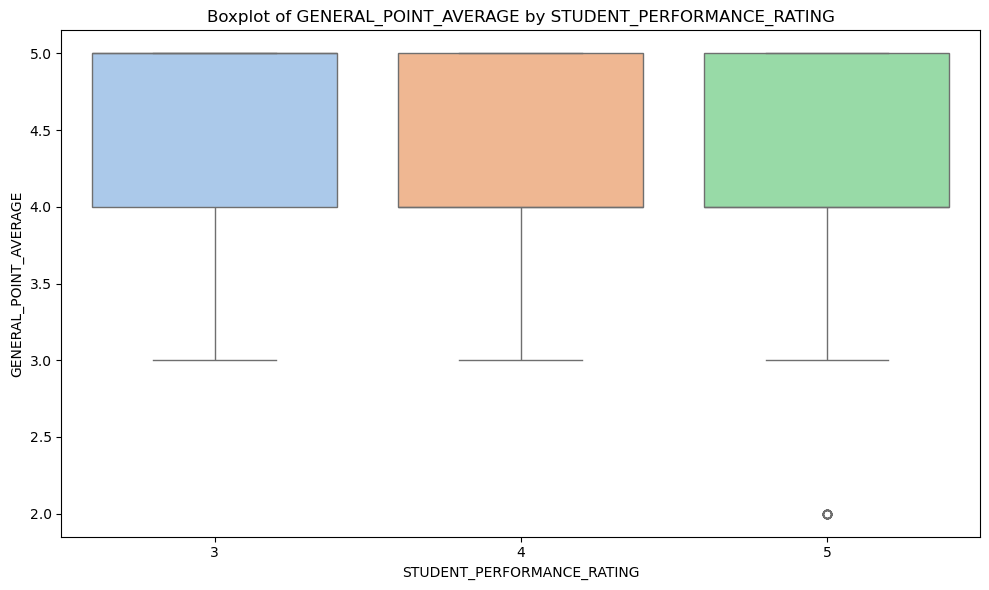

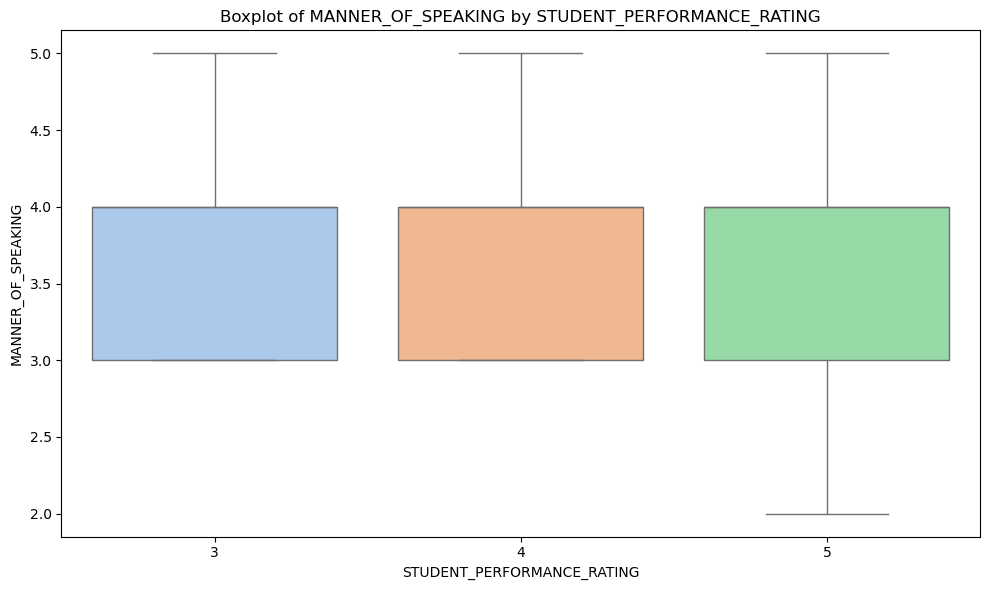

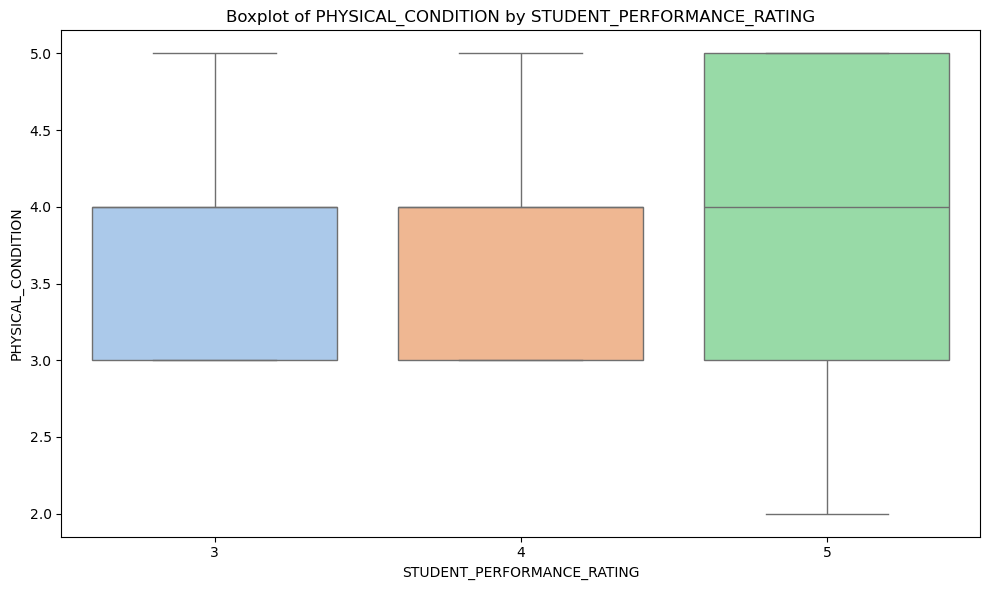

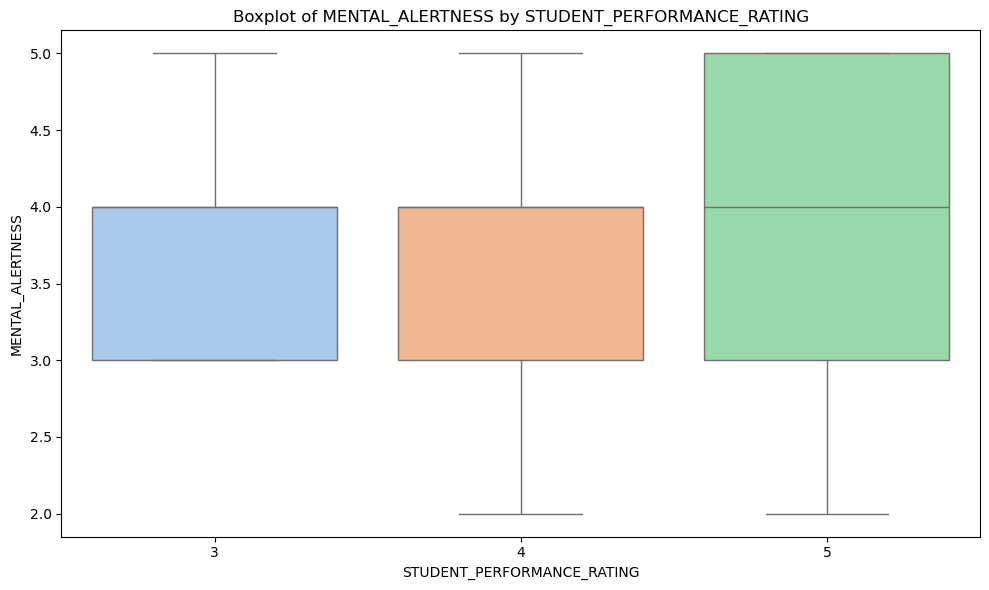

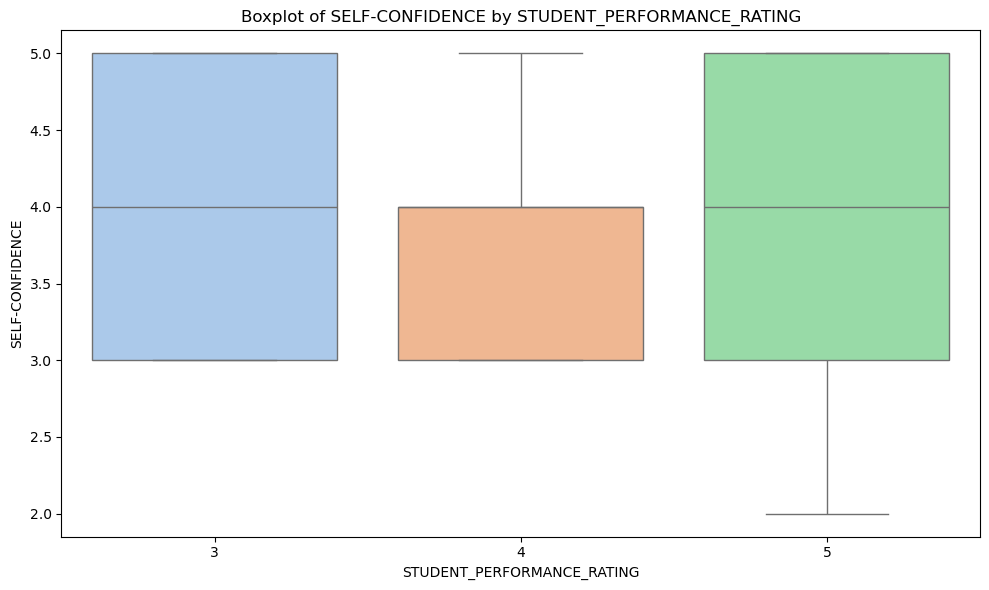

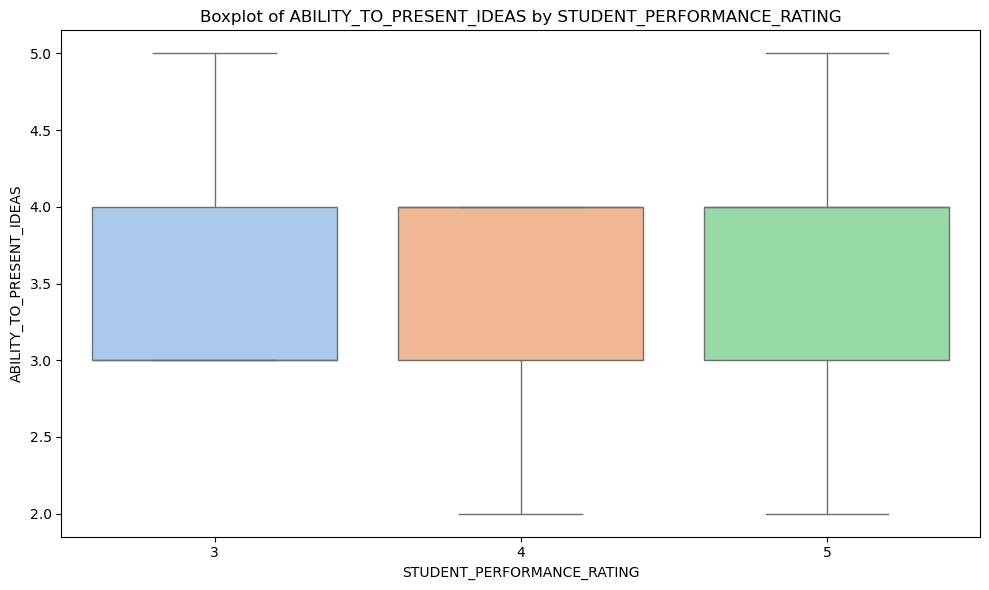

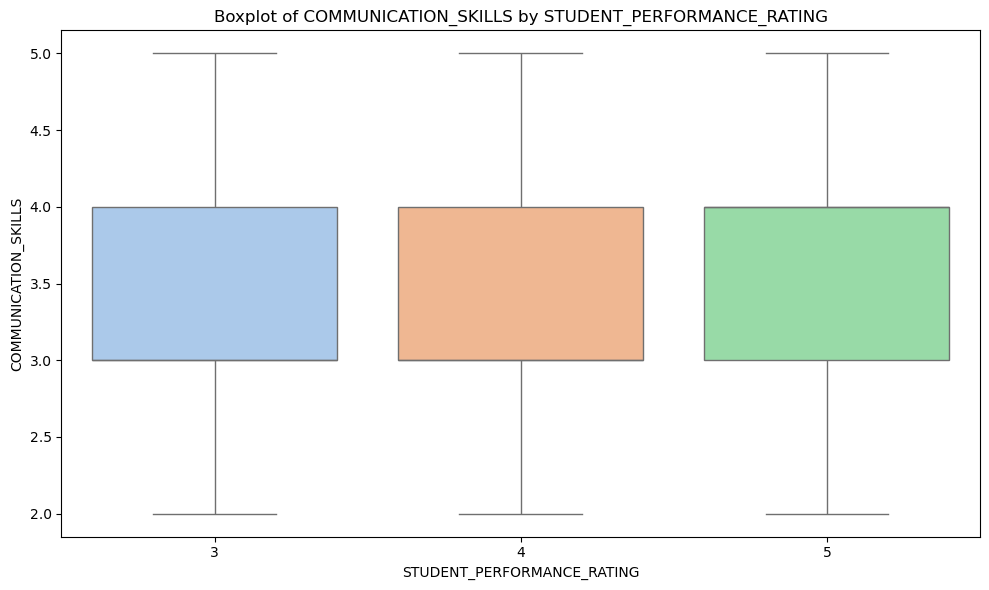

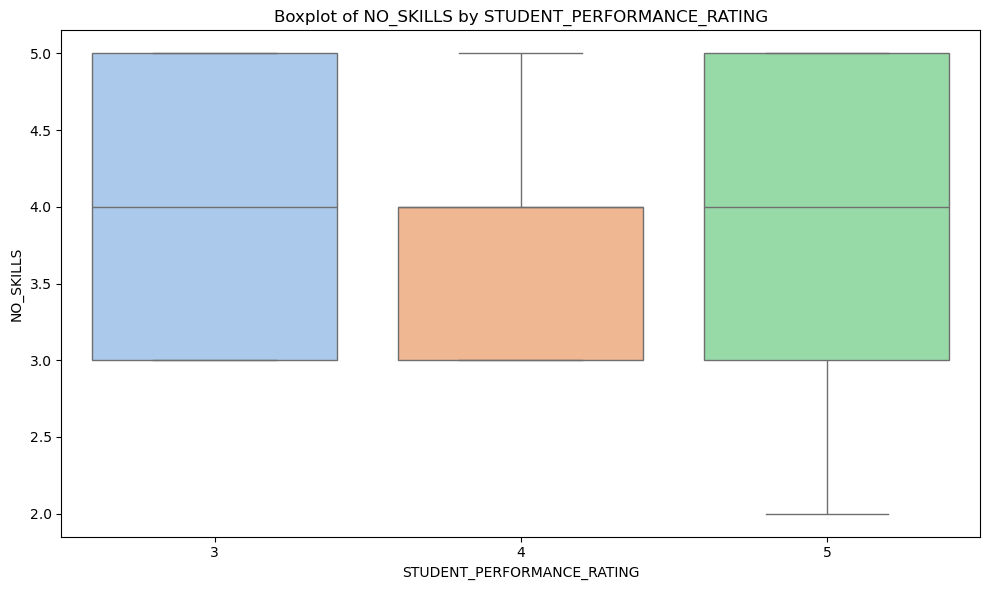

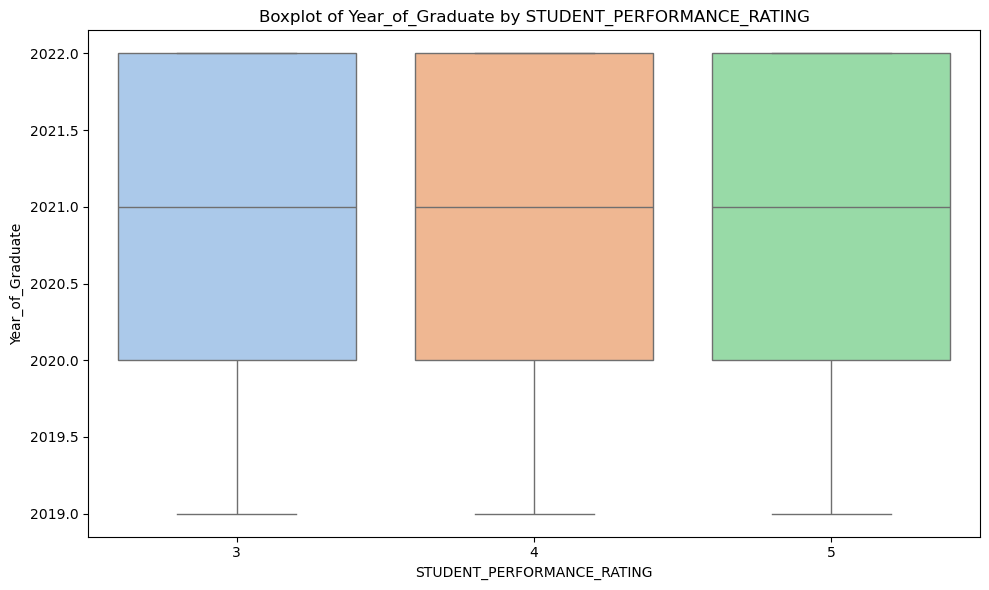

In [21]:
# Generate boxplots
for var in boxplot_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data_numeric[dependent_var], y=data_numeric[var], palette='pastel')
    plt.title(f'Boxplot of {var} by {dependent_var}')
    plt.xlabel(dependent_var)
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

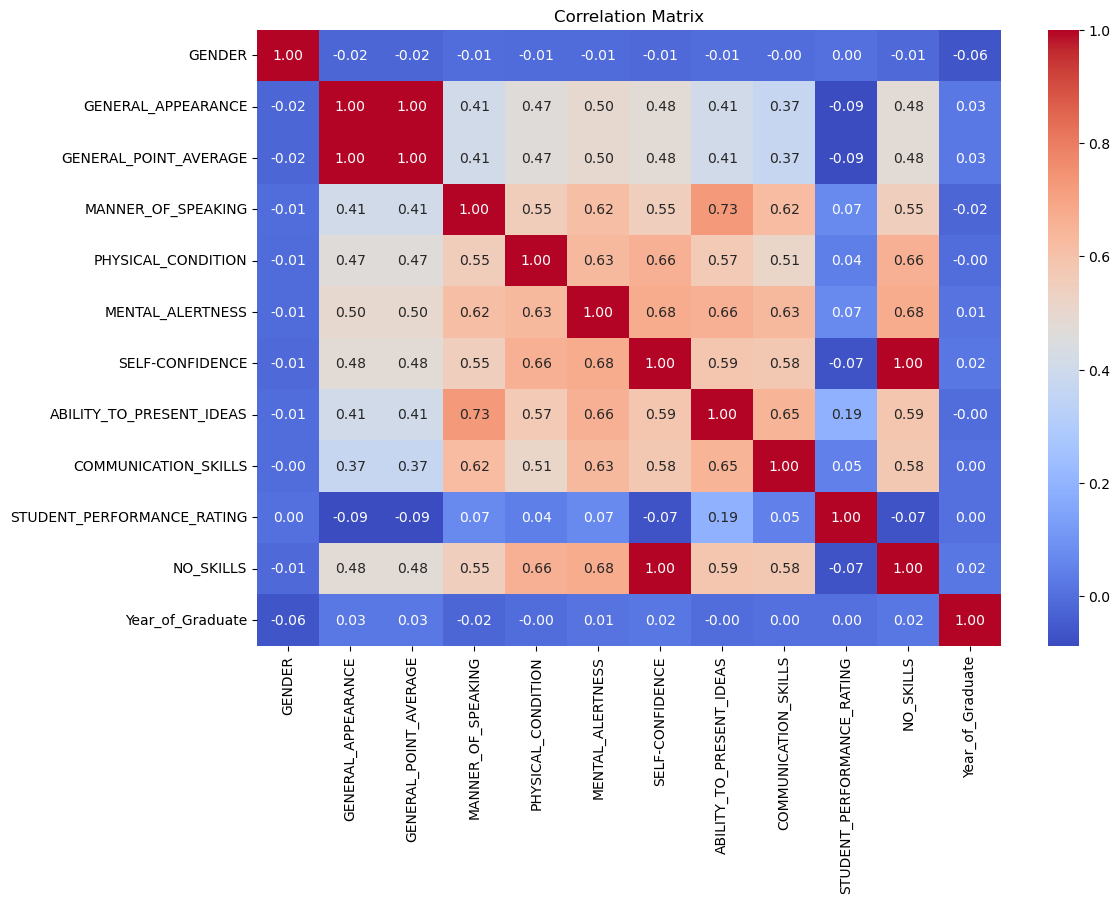

In [22]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
# Select numeric columns from the DataFrame 'data'
numeric_columns = data.select_dtypes(include=['number'])
corr = numeric_columns.corr() # Calculate correlation using the selected numeric columns
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [23]:
data.duplicated().sum()

np.int64(0)

In [24]:
data.isnull().sum()

Name_of_Student               0
GENDER                        0
GENERAL_APPEARANCE            0
GENERAL_POINT_AVERAGE         0
MANNER_OF_SPEAKING            0
PHYSICAL_CONDITION            0
MENTAL_ALERTNESS              0
SELF-CONFIDENCE               0
ABILITY_TO_PRESENT_IDEAS      0
COMMUNICATION_SKILLS          0
STUDENT_PERFORMANCE_RATING    0
NO_SKILLS                     0
CLASS                         0
Year_of_Graduate              0
dtype: int64

In [25]:
zero_var_cols = [col for col in data.columns if data[col].nunique() <= 1]

In [26]:
print("Zero variance columns:", zero_var_cols)

Zero variance columns: []


In [27]:
# Detect outliers using IQR and manual bounds on Likert scale
outlier_summary = {}

# Select numeric columns from the original DataFrame 'data'
data_numeric = data.select_dtypes(include=['float64', 'int64'])

In [28]:
for col in data_numeric.columns:
   # IQR Method
    Q1 = data_numeric[col].quantile(0.25)
    Q3 = data_numeric[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_outliers = data_numeric[(data_numeric[col] < Q1 - 1.5 * IQR) | (data_numeric[col] > Q3 + 1.5 * IQR)]

    # Manual bound check (for Likert-type scales assumed from 1 to 5)
    manual_outliers = data_numeric[(data_numeric[col] < 1) | (data_numeric[col] > 5)]

    outlier_summary[col] = {
        "IQR Outlier Count": len(iqr_outliers),
        "Manual Bound Violation Count": len(manual_outliers)
    }

In [29]:
# Convert summary to DataFrame
outlier_summary_data = pd.DataFrame(outlier_summary).T
print(outlier_summary_data)

                            IQR Outlier Count  Manual Bound Violation Count
GENDER                                      0                             0
GENERAL_APPEARANCE                         16                             0
GENERAL_POINT_AVERAGE                      16                             0
MANNER_OF_SPEAKING                          0                             0
PHYSICAL_CONDITION                          0                             0
MENTAL_ALERTNESS                            0                             0
SELF-CONFIDENCE                             0                             0
ABILITY_TO_PRESENT_IDEAS                    0                             0
COMMUNICATION_SKILLS                        0                             0
STUDENT_PERFORMANCE_RATING                  0                             0
NO_SKILLS                                   0                             0
Year_of_Graduate                            0                          2982


In [30]:
data.drop(columns=["Name_of_Student"], errors='ignore', inplace=True)

# Drop missing values
data.dropna(inplace=True)

# Encode target
data['CLASS'] = data['CLASS'].map({'Employable': 1, 'LessEmployable': 0})

# Check available styles
print(mpl.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [31]:
# Replace 'seaborn-deep' with a valid style from the output above.
try:
    mpl.style.use('seaborn-v0_8-deep')
except OSError:
    # Fallback to a general seaborn style if the specific one is not available
    try:
        mpl.style.use('seaborn-v0_8')
    except OSError:
         # Fallback to a simpler style if seaborn styles are not working
         print("Warning: Seaborn styles not found, using 'ggplot' style.")
         mpl.style.use('ggplot')

In [32]:
#  Count number of samples in each class
counts = data['CLASS'].value_counts().tolist()
labels = ['Employable' if val == 1 else 'Less Employable' for val in data['CLASS'].value_counts().index]

# Print values for verification
print(f"This is the headers: {labels}\nThis is the count: {counts}")


This is the headers: ['Employable', 'Less Employable']
This is the count: [1729, 1253]


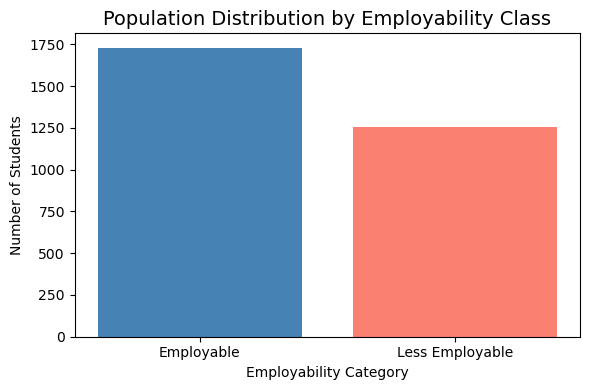

In [33]:
# Plot the bar chart
plt.figure(figsize=(6,4))
plt.bar(labels, counts, color=['steelblue', 'salmon'])
plt.title("Population Distribution by Employability Class", fontsize=14)
plt.xlabel("Employability Category")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.show()

In [34]:
import math
#Gets the piechart vaariables
def pie_chart_var(col_name, data):
    counts = [g.shape[0] for _,g in  data.groupby(col_name)]
    headers = [g.loc[:,col_name].iloc[0] for _,g in  data.groupby(col_name)]

    #get percentages
    percentages = np.array(counts) / np.array(counts).sum() *100
    headers = [f"{label} - {round(percentage,2)}%" for label, percentage in zip(headers, percentages)]

    return counts, headers

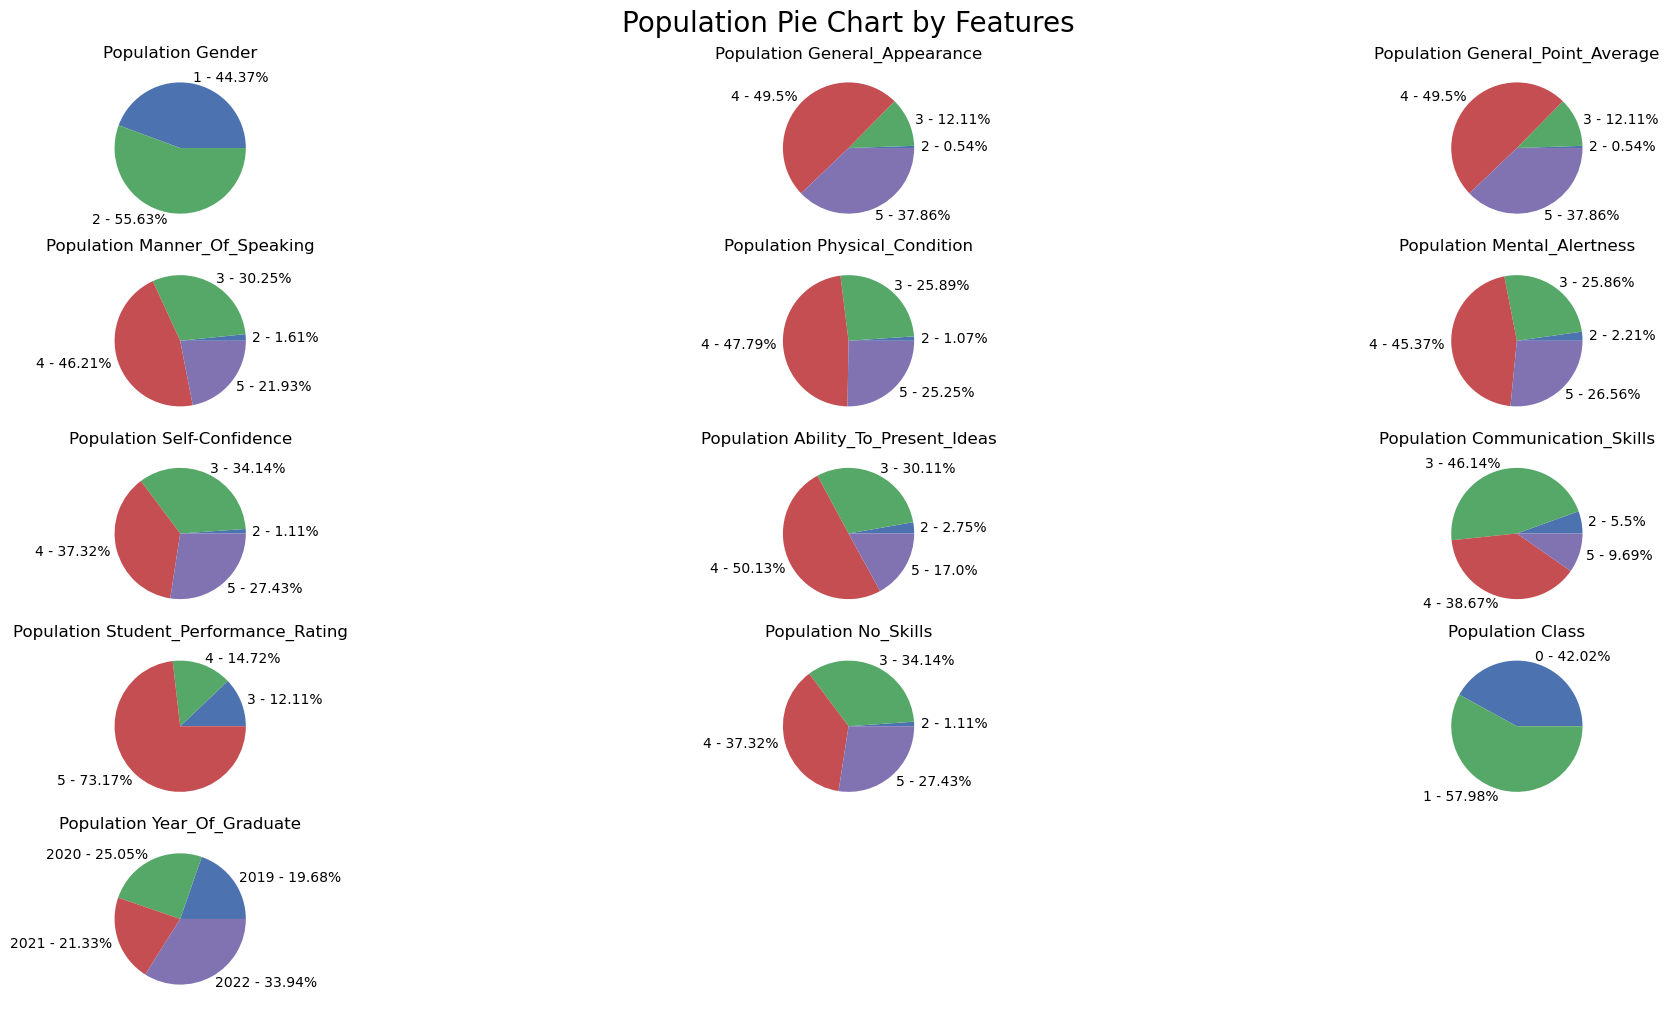

In [35]:

#Creating the figure
col = 3
row = math.ceil(len(data.columns)/col)
fig,ax = plt.subplots(row,col, figsize=(20,10), layout='constrained')

for idx, ax in enumerate(ax.flatten()):
    if idx < len(data.columns):
        col_name = list(data.columns)[idx]
        counts, headers = pie_chart_var(col_name, data)
        ax.pie(counts, labels=headers)
        ax.set_title(f"Population {col_name.title()}")
    else:
        ax.remove()

fig.suptitle("Population Pie Chart by Features", fontsize=20)
plt.show()


In [36]:
# Correlation

print(f'This is the Skew\n{data.skew()}\n\nThis is the Kurtosis\n{data.kurtosis()}')


This is the Skew
GENDER                       -0.226911
GENERAL_APPEARANCE           -0.452415
GENERAL_POINT_AVERAGE        -0.452415
MANNER_OF_SPEAKING           -0.028022
PHYSICAL_CONDITION           -0.111690
MENTAL_ALERTNESS             -0.212908
SELF-CONFIDENCE               0.037227
ABILITY_TO_PRESENT_IDEAS     -0.097850
COMMUNICATION_SKILLS          0.218410
STUDENT_PERFORMANCE_RATING   -1.493381
NO_SKILLS                     0.037227
CLASS                        -0.323558
Year_of_Graduate             -0.194581
dtype: float64

This is the Kurtosis
GENDER                       -1.949820
GENERAL_APPEARANCE           -0.387747
GENERAL_POINT_AVERAGE        -0.387747
MANNER_OF_SPEAKING           -0.781600
PHYSICAL_CONDITION           -0.795129
MENTAL_ALERTNESS             -0.702947
SELF-CONFIDENCE              -1.192080
ABILITY_TO_PRESENT_IDEAS     -0.430955
COMMUNICATION_SKILLS         -0.349087
STUDENT_PERFORMANCE_RATING    0.703179
NO_SKILLS                    -1.192080
CLASS     

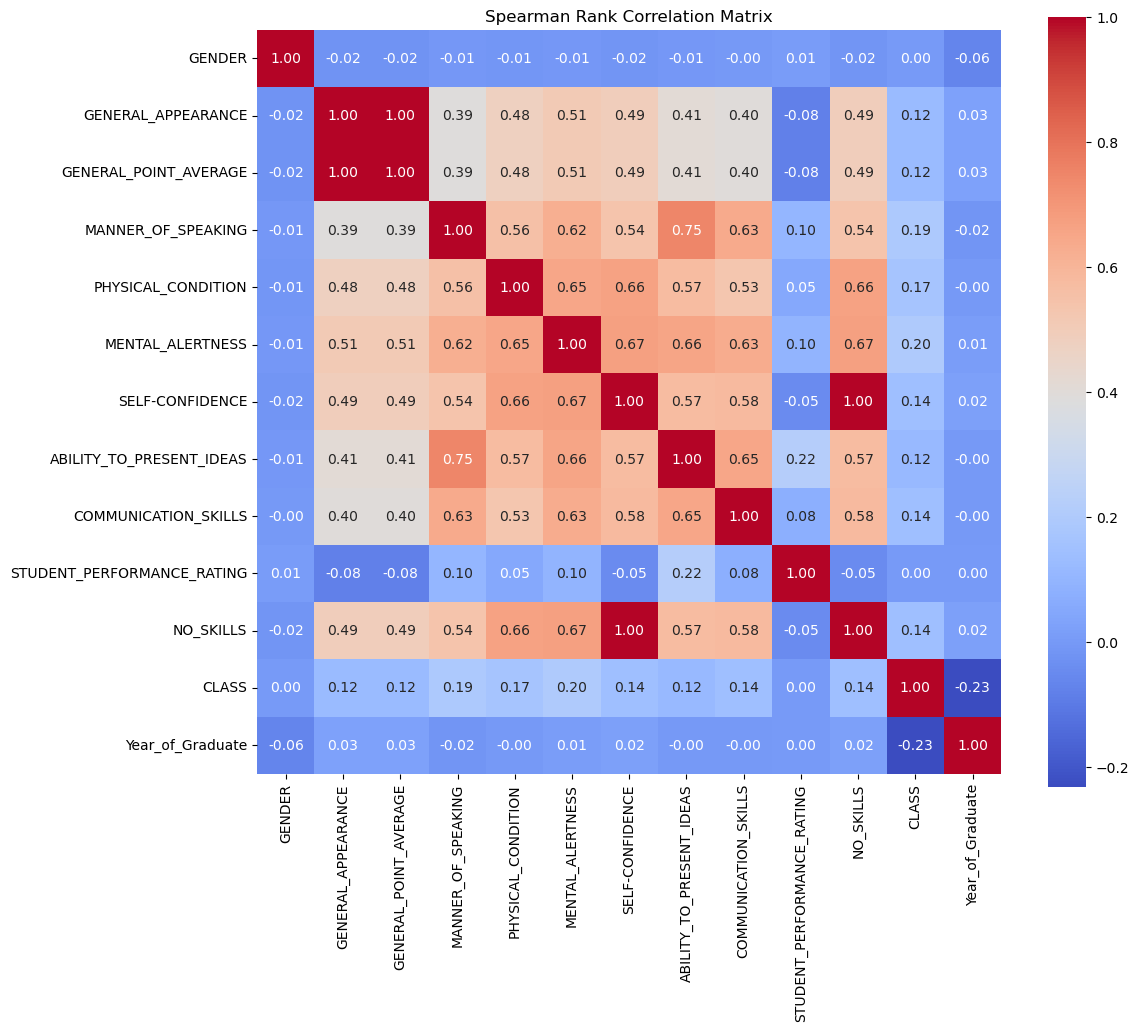

In [37]:
# Compute Spearman correlation matrix
spearman_corr = data.corr(method='spearman')

# Visualize Spearman correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Spearman Rank Correlation Matrix")
plt.show()

In [38]:
# Identify features highly correlated with CLASS
correlation_with_target = spearman_corr['CLASS'].drop('CLASS').sort_values(ascending=False)
correlation_with_target

correlation_by_three = []

In [39]:

for col in (spearman_corr.columns):
    # Since Highest Correlation is always itself, it is first in the list
    correlation = spearman_corr[col].sort_values(ascending=False).index[0:4]
    correlation_by_three.append(correlation)

GENDER is correlated to the student's: ['STUDENT_PERFORMANCE_RATING', 'CLASS', 'COMMUNICATION_SKILLS']

GENERAL_APPEARANCE is correlated to the student's: ['GENERAL_POINT_AVERAGE', 'MENTAL_ALERTNESS', 'SELF-CONFIDENCE']

GENERAL_APPEARANCE is correlated to the student's: ['GENERAL_POINT_AVERAGE', 'MENTAL_ALERTNESS', 'SELF-CONFIDENCE']

MANNER_OF_SPEAKING is correlated to the student's: ['ABILITY_TO_PRESENT_IDEAS', 'COMMUNICATION_SKILLS', 'MENTAL_ALERTNESS']

PHYSICAL_CONDITION is correlated to the student's: ['NO_SKILLS', 'SELF-CONFIDENCE', 'MENTAL_ALERTNESS']

MENTAL_ALERTNESS is correlated to the student's: ['SELF-CONFIDENCE', 'NO_SKILLS', 'ABILITY_TO_PRESENT_IDEAS']

SELF-CONFIDENCE is correlated to the student's: ['NO_SKILLS', 'MENTAL_ALERTNESS', 'PHYSICAL_CONDITION']

ABILITY_TO_PRESENT_IDEAS is correlated to the student's: ['MANNER_OF_SPEAKING', 'MENTAL_ALERTNESS', 'COMMUNICATION_SKILLS']

COMMUNICATION_SKILLS is correlated to the student's: ['ABILITY_TO_PRESENT_IDEAS', 'MANNER_O

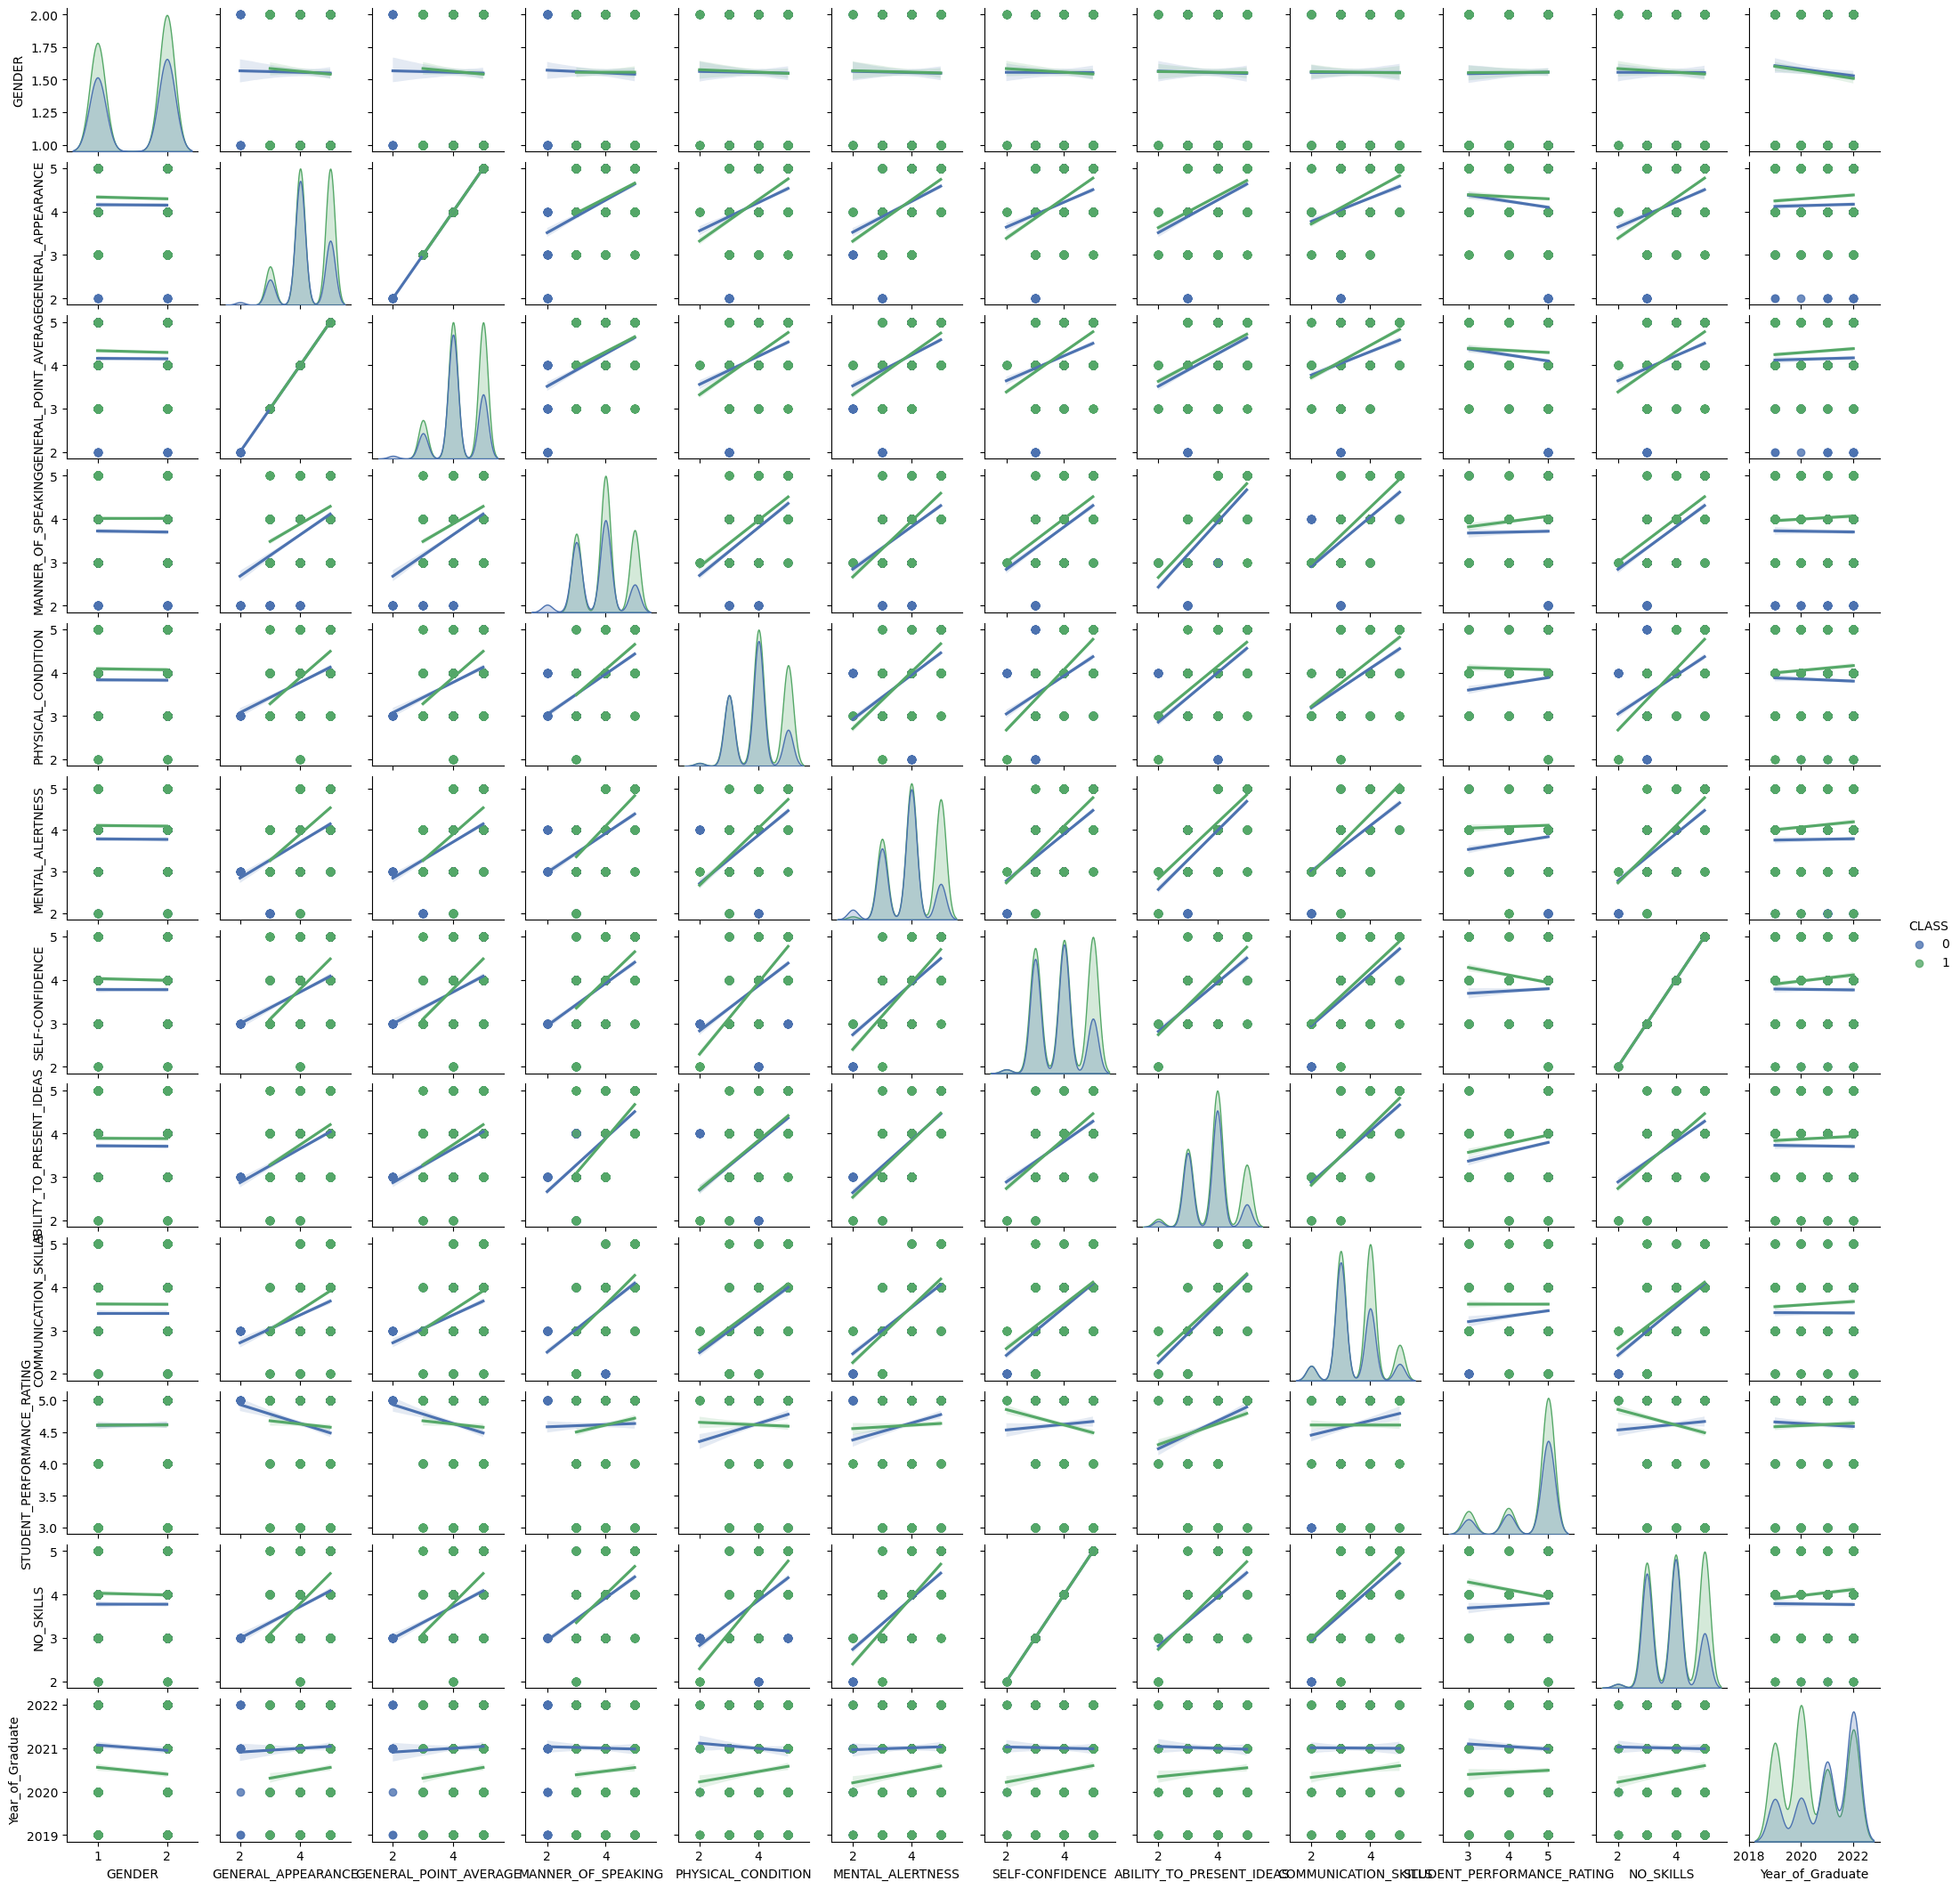

In [40]:
for cor in correlation_by_three:
    print(f"{cor[0]} is correlated to the student's: {list(cor[1:])}\n")

plot = sns.pairplot(data, kind='reg', hue='CLASS', height=1.8)
plot.savefig("pairplot.png", dpi=100)

In [41]:
# Normalize numeric features
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler
scaler = MinMaxScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [42]:
# Split features and target
X = data.drop(['CLASS'], axis=1)
y = data['CLASS']

print(X.columns.tolist())

['GENDER', 'GENERAL_APPEARANCE', 'GENERAL_POINT_AVERAGE', 'MANNER_OF_SPEAKING', 'PHYSICAL_CONDITION', 'MENTAL_ALERTNESS', 'SELF-CONFIDENCE', 'ABILITY_TO_PRESENT_IDEAS', 'COMMUNICATION_SKILLS', 'STUDENT_PERFORMANCE_RATING', 'NO_SKILLS', 'Year_of_Graduate']


In [65]:
y.value_counts()

CLASS
1.0    1729
0.0    1253
Name: count, dtype: int64

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [45]:
# Output the shape of processed data
print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)

Train shape: (2766, 12)
Test shape: (597, 12)


In [46]:
# Output the shape of processed data
print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)

Train shape: (2766, 12)
Test shape: (597, 12)


In [47]:
model_defs = {
    'SVM': (SVC(probability=True, random_state=42), {
        'C': [0.1, 1, 10],
        'gamma': [0.1, 1, 10],
        'kernel': ['rbf']
    }),
    'Decision Tree': (DecisionTreeClassifier(random_state=42), {
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10]
    }),
    'Logistic Regression': (LogisticRegression(max_iter=1000, random_state=42), {
        'C': [0.1, 1, 10],
        'penalty': ['l2']
    }),
    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    })
}

In [48]:
results = {}
best_model = None
best_f1 = 0

In [49]:
#Import necessary metrics and joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import joblib


In [50]:
# Loop through and run grid search
for name, (model, params) in model_defs.items():
    print(f"Training {name}...")
    grid = GridSearchCV(model, params, cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train_scaled, y_train_res)

    best_est = grid.best_estimator_
    y_pred = best_est.predict(X_test_scaled)
    y_prob = best_est.predict_proba(X_test_scaled)[:, 1]

    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'best_params': grid.best_params_
    }

    if results[name]['f1'] > best_f1:
        best_f1 = results[name]['f1']
        best_model = best_est


Training SVM...
Training Decision Tree...
Training Logistic Regression...
Training KNN...


In [66]:
best_model

SVC(C=10, gamma=0.1, probability=True, random_state=42)

In [67]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 62 189]
 [ 48 298]]
              precision    recall  f1-score   support

         0.0       0.56      0.25      0.34       251
         1.0       0.61      0.86      0.72       346

    accuracy                           0.60       597
   macro avg       0.59      0.55      0.53       597
weighted avg       0.59      0.60      0.56       597



In [51]:
# Save best model
joblib.dump(best_model, 'employability_predictor.pkl')

['employability_predictor.pkl']

In [52]:
# Generate results table
results_df = pd.DataFrame(results).T
results_df.to_csv('model_performance.csv')
print(results_df)

                     accuracy precision    recall        f1   roc_auc  \
SVM                  0.914573  0.922636  0.930636  0.926619   0.96252   
Decision Tree        0.897822  0.884097  0.947977  0.914923  0.971657   
Logistic Regression  0.671692  0.741935   0.66474   0.70122  0.701967   
KNN                  0.901173  0.906516  0.924855  0.915594  0.951869   

                            confusion_matrix  \
SVM                   [[224, 27], [24, 322]]   
Decision Tree         [[208, 43], [18, 328]]   
Logistic Regression  [[171, 80], [116, 230]]   
KNN                   [[218, 33], [26, 320]]   

                                                   best_params  
SVM                   {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}  
Decision Tree        {'max_depth': 15, 'min_samples_split': 2}  
Logistic Regression                 {'C': 10, 'penalty': 'l2'}  
KNN                  {'n_neighbors': 3, 'weights': 'distance'}  


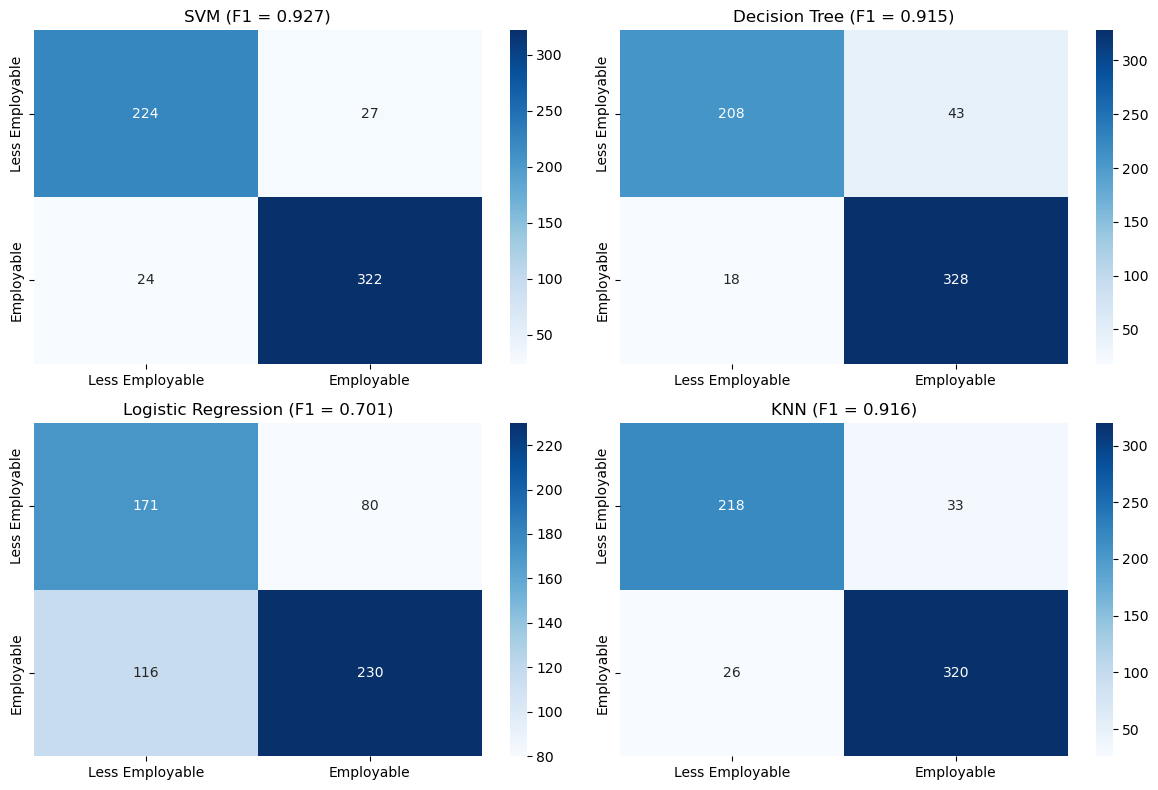

In [53]:
# Confusion matrix plots
plt.figure(figsize=(12, 8))
for i, (name, res) in enumerate(results.items(), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(res['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=['Less Employable', 'Employable'],
                yticklabels=['Less Employable', 'Employable'])
    plt.title(f"{name} (F1 = {res['f1']:.3f})")
plt.tight_layout()
plt.savefig('confusion_matrices.png')
plt.show()

In [54]:
# Plot Learning Curve for SVM (Best model)
from sklearn.model_selection import learning_curve # Import necessary modules
from sklearn.svm import SVC # Import SVC to recreate the best model


In [55]:
def plot_learning_curve(estimator, title, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(.1, 1.0, 5), random_state=42)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()


In [56]:
# Use the best SVM model found during the grid search for the learning curve
# Access the best parameters for SVM from the 'results' dictionary and create a new SVC instance
best_svm_params = results["SVM"]["best_params"]
best_svm_model = SVC(probability=True, random_state=42, **best_svm_params)



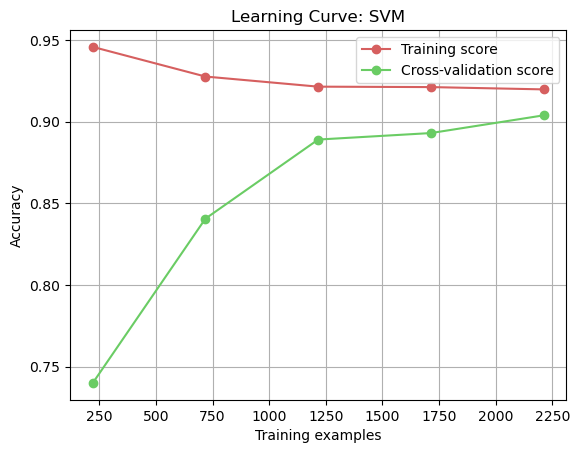

In [57]:
# Use y_train_res which was the variable name used in the SMOTE step
plot_learning_curve(best_svm_model, "Learning Curve: SVM", X_train_scaled, y_train_res)


In [58]:
# Validation Curve with gamma=5
from sklearn.model_selection import validation_curve # Import validation_curve

param_range = [0.01, 0.1, 1, 10, 100]
train_scores, test_scores = validation_curve(
    SVC(kernel='rbf', gamma=5), X_train_res, y_train_res,
    param_name='C', param_range=param_range,
    cv=5, scoring='f1', n_jobs=-1
)

In [59]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

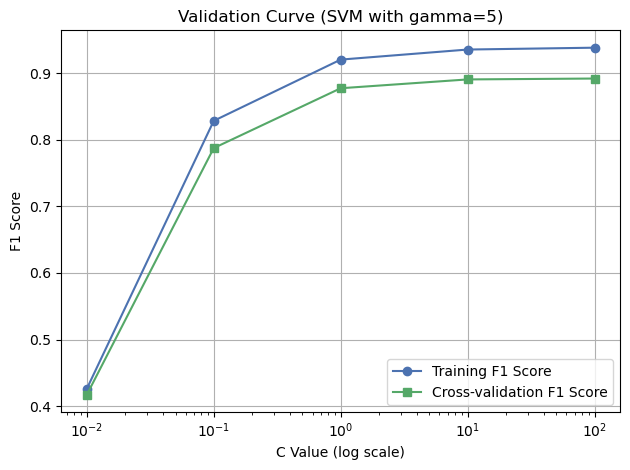

In [60]:

# Plot
plt.figure()
plt.semilogx(param_range, train_scores_mean, label="Training F1 Score", marker='o')
plt.semilogx(param_range, test_scores_mean, label="Cross-validation F1 Score", marker='s')
plt.title("Validation Curve (SVM with gamma=5)")
plt.xlabel("C Value (log scale)")
plt.ylabel("F1 Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [61]:
import joblib

# Save the trained model
joblib.dump(best_model, 'employability_predictor.pkl')

# Save the scaler too (if you used one)
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [62]:


print(X_train_res.columns.tolist())
print(X_train_res.dtypes)


['GENDER', 'GENERAL_APPEARANCE', 'GENERAL_POINT_AVERAGE', 'MANNER_OF_SPEAKING', 'PHYSICAL_CONDITION', 'MENTAL_ALERTNESS', 'SELF-CONFIDENCE', 'ABILITY_TO_PRESENT_IDEAS', 'COMMUNICATION_SKILLS', 'STUDENT_PERFORMANCE_RATING', 'NO_SKILLS', 'Year_of_Graduate']
GENDER                        float64
GENERAL_APPEARANCE            float64
GENERAL_POINT_AVERAGE         float64
MANNER_OF_SPEAKING            float64
PHYSICAL_CONDITION            float64
MENTAL_ALERTNESS              float64
SELF-CONFIDENCE               float64
ABILITY_TO_PRESENT_IDEAS      float64
COMMUNICATION_SKILLS          float64
STUDENT_PERFORMANCE_RATING    float64
NO_SKILLS                     float64
Year_of_Graduate              float64
dtype: object


In [63]:
# On test set
y_pred = best_model.predict(X_test_scaled)
pd.Series(y_pred).value_counts()

1.0    349
0.0    248
Name: count, dtype: int64

In [64]:
print("Confusion Matrix:")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[224  27]
 [ 24 322]]


In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

# Load your data
data = pd.read_excel("Student_Employability_dataset_2025.xlsx")

# Drop 'Name_of_Student' column if exists
data = data.drop(['Name_of_Student'], axis=1, errors='ignore')

# Encode target variable 'CLASS'
le = LabelEncoder()
data['CLASS'] = le.fit_transform(data['CLASS'])
print(f"Encoded classes: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Feature selection
X = data.drop(['CLASS'], axis=1)
y = data['CLASS']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Define SVM model and parameters
svm_model = SVC(probability=True, random_state=42)
svm_params = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'kernel': ['rbf']
}

# GridSearchCV for hyperparameter tuning
grid = GridSearchCV(svm_model, svm_params, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train_smote)

# Best model
best_model = grid.best_estimator_
print("Best parameters:", grid.best_params_)

# Evaluate on test set
y_pred = best_model.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save model and scaler
joblib.dump(best_model, 'employability_predictor.pkl')
joblib.dump(scaler, 'scaler.pkl')


Encoded classes: {'Employable': np.int64(0), 'LessEmployable': np.int64(1)}
Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Confusion Matrix:
 [[448  48]
 [ 46 353]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       496
           1       0.88      0.88      0.88       399

    accuracy                           0.89       895
   macro avg       0.89      0.89      0.89       895
weighted avg       0.90      0.89      0.89       895



['scaler.pkl']

In [78]:
data.sample(10)

,GENDER,GENERAL_APPEARANCE,GENERAL_POINT_AVERAGE,MANNER_OF_SPEAKING,PHYSICAL_CONDITION,MENTAL_ALERTNESS,SELF-CONFIDENCE,ABILITY_TO_PRESENT_IDEAS,COMMUNICATION_SKILLS,STUDENT_PERFORMANCE_RATING,NO_SKILLS,CLASS,Year_of_Graduate
898,2,4,4,4,4,4,3,3,3,5,3,1,2022
2075,2,4,4,3,3,3,3,3,2,5,3,0,2020
981,2,4,4,4,4,4,4,4,4,5,4,1,2022
2971,2,3,3,4,4,3,4,4,3,5,4,1,2022
2252,2,4,4,4,4,3,4,4,3,5,4,1,2019
2087,2,4,4,3,4,3,3,3,3,5,3,0,2020
2733,2,5,5,4,4,4,4,4,4,3,4,0,2020
1842,1,5,5,5,5,5,5,5,4,5,5,0,2022
1941,2,5,5,3,3,3,3,3,2,5,3,0,2021
1191,1,4,4,4,4,3,3,4,3,5,3,0,2022


In [ ]:
['GENDER', 'GENERAL_APPEARANCE', 'GENERAL_POINT_AVERAGE', 'MANNER_OF_SPEAKING', 'PHYSICAL_CONDITION', 'MENTAL_ALERTNESS', 'SELF-CONFIDENCE', 'ABILITY_TO_PRESENT_IDEAS', 'COMMUNICATION_SKILLS', 'STUDENT_PERFORMANCE_RATING', 'NO_SKILLS', 'Year_of_Graduate']
GENDER                        float64
GENERAL_APPEARANCE            float64
GENERAL_POINT_AVERAGE         float64
MANNER_OF_SPEAKING            float64
PHYSICAL_CONDITION            float64
MENTAL_ALERTNESS              float64
SELF-CONFIDENCE               float64
ABILITY_TO_PRESENT_IDEAS      float64
COMMUNICATION_SKILLS          float64
STUDENT_PERFORMANCE_RATING    float64
NO_SKILLS                     float64
Year_of_Graduate              float64
dtype: object

In [79]:
print(data['GENDER'].unique())


[1 2]
